<a href="https://colab.research.google.com/github/JUANESPG29/ModeladoySimulacion/blob/main/EjerciciosCap%C3%ADtulo3_JuanEstebanPab%C3%B3nG%C3%B3mez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Dynamics and Chaos - Steven H. Strogatz - Capítulo 3

### Juan Esteban Pabón Gómez


In [24]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as solver
from scipy.optimize import root_scalar

In [57]:
def plot_vector_fields(f,critical_values,xi,xf,n,ti,tf):
  b = 0
  x = np.linspace(xi,xf,100)
  plt.figure(figsize=(int(5*len(critical_values)),10))
  p = 1
  for i in critical_values:
    plt.subplot(2,len(critical_values),p)
    p = p+1
    plt.plot(x,f(t=0,x=x,r=i,b=0))
    plt.axhline(0,color='k')
    plt.axvline(0,color='k')
    plt.grid()
    plt.title(f"$r = {i}$",fontsize=20)
    plt.xlabel("$x$",fontsize=15)
    plt.ylabel("$\dot x$",fontsize = 15)

    tspam=[ti, tf]
    t=np.linspace(ti,tf,100)
    plt.subplot(2,len(critical_values),p+len(critical_values)-1)
    for x0 in np.linspace(xi,xf,n):
      sol=solver(f,tspam,[x0],args=(i,b),t_eval=t)
      plt.plot(sol.t, sol.y[0])
      plt.ylim(-10,10)
      plt.xlabel("$t$",fontsize=15)
      plt.ylabel("$x(t)$",fontsize=15)
  plt.tight_layout()

# **3.1 SADDLE-NODE BIFURCATION**

## 3.1.1
### \begin{equation}
\dot { x } = 1 + rx + x^2
\end{equation}



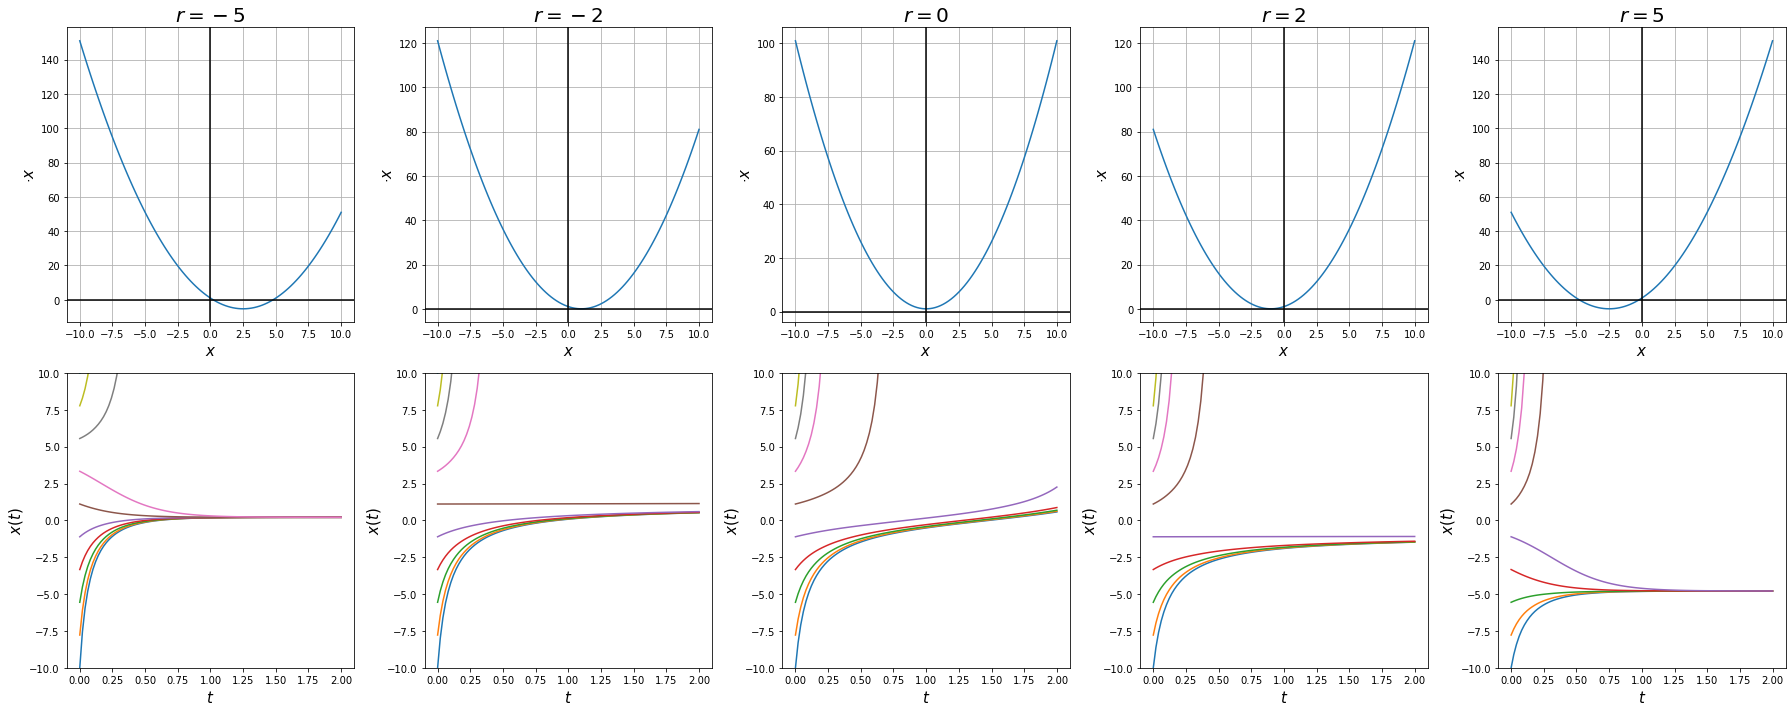

In [62]:
def f1(t,x,r,b=0):
  return 1 + r*x + x**2


plot_vector_fields(f,[-5,-2,0,2,5],-10,10,10,0,2)

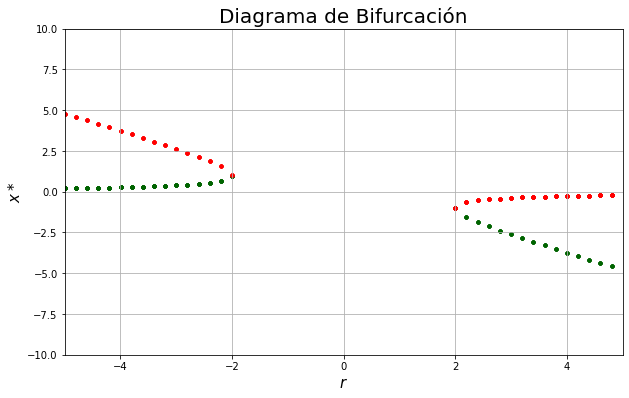

In [63]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f1,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()


## 3.1.2
### \begin{equation}
\dot { x } = r-cosh(x)
\end{equation}



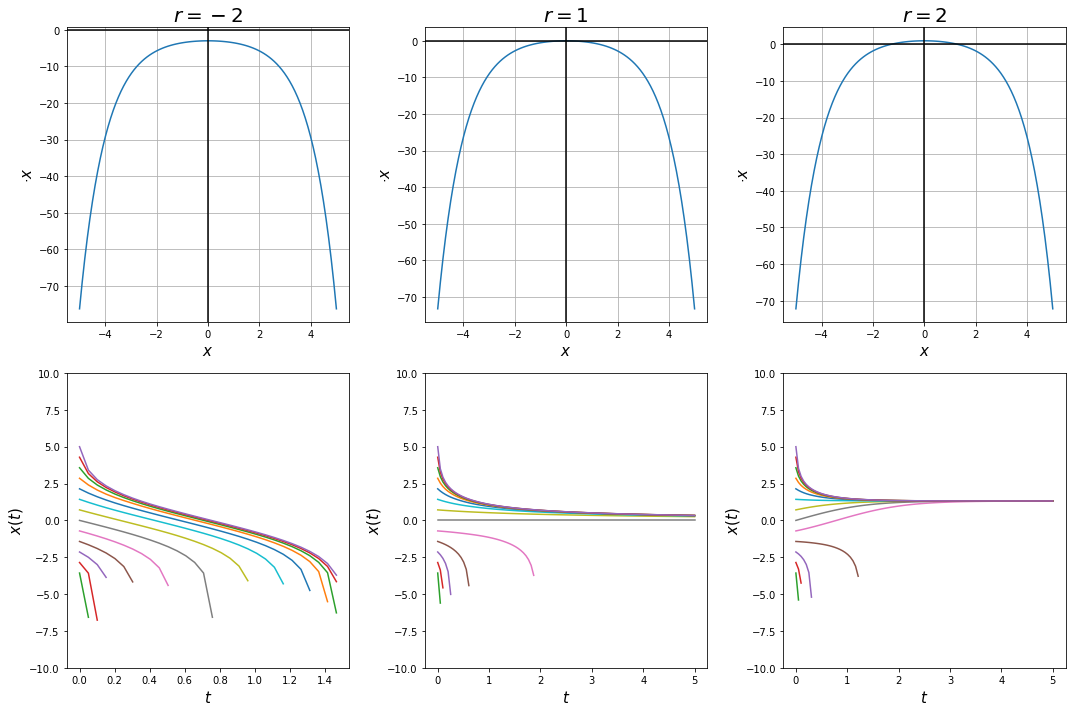

In [66]:

def f2(t,x,r,b=0):
  return r - np.cosh(x)

plot_vector_fields(f2,[-2,1,2],-5,5,15,0,5)

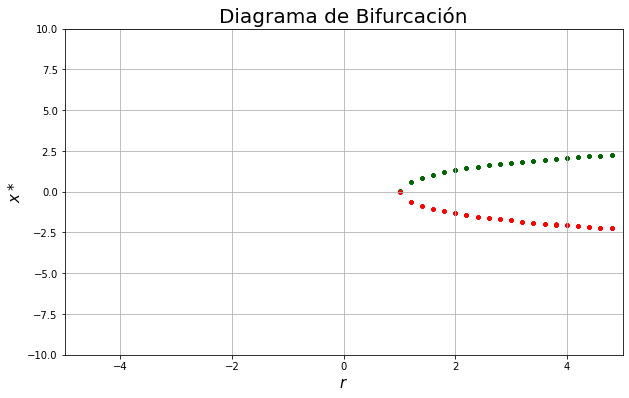

In [67]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f2,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)

plt.show()

# **3.2 TRANSCRITICAL BIFURCATION**



## 3.2.1
### \begin{equation}
\dot { x } = rx+x^2
\end{equation}



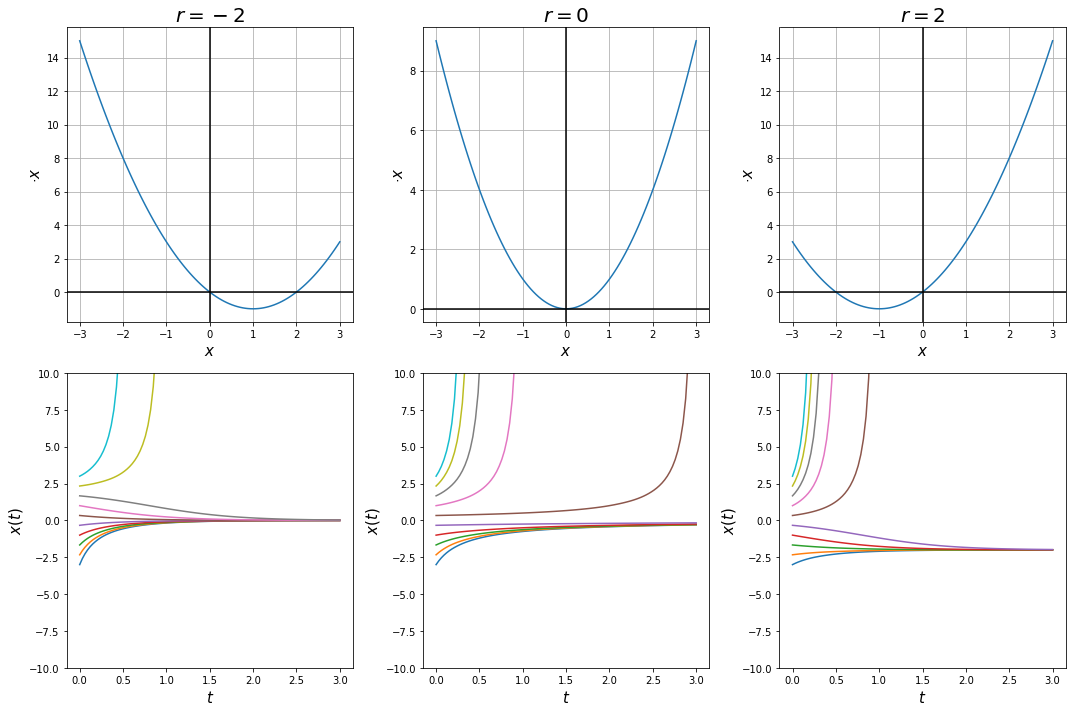

In [69]:
def f3(t,x,r,b=0):
  return r*x + x**2 

plot_vector_fields(f3,[-2,0,2],-3,3,10,0,3)

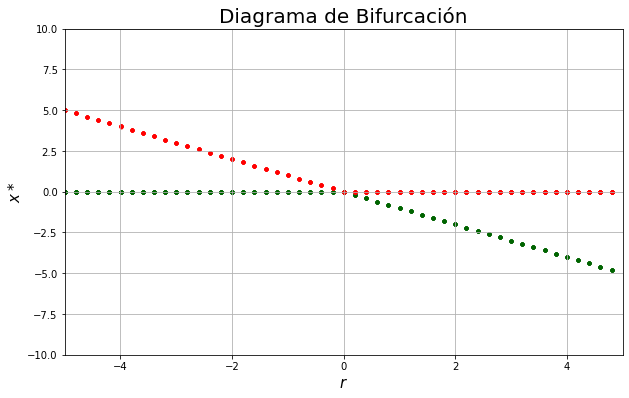

In [70]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f3,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f3,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.2.3
### \begin{equation}
\dot { x } = x-rx(1-x)
\end{equation}



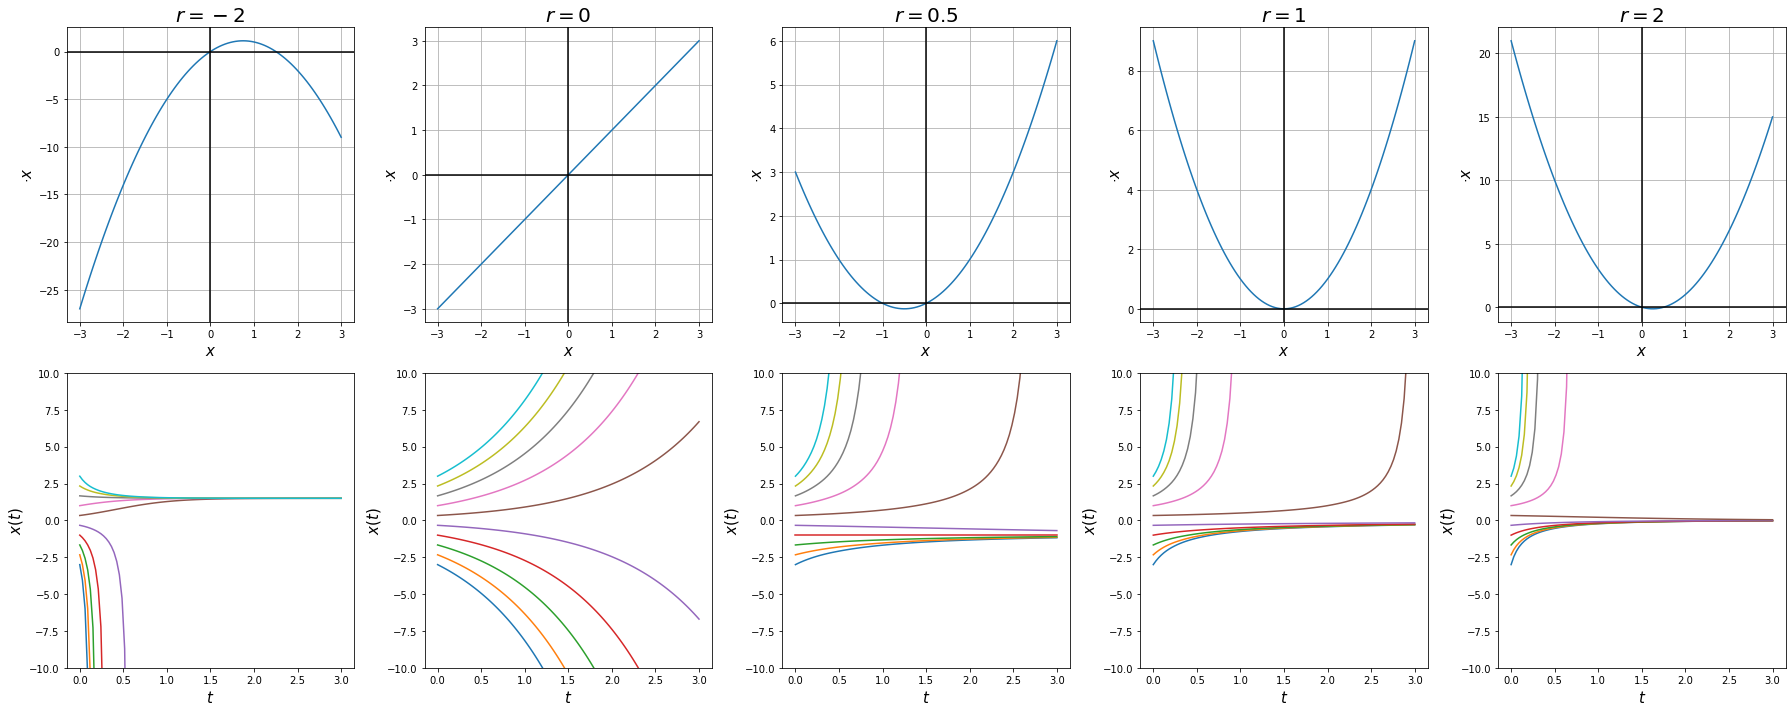

In [71]:
def f4(t,x,r,b=0):
  return x-r*x*(1-x) 

plot_vector_fields(f4,[-2,0,0.5,1,2],-3,3,10,0,3)

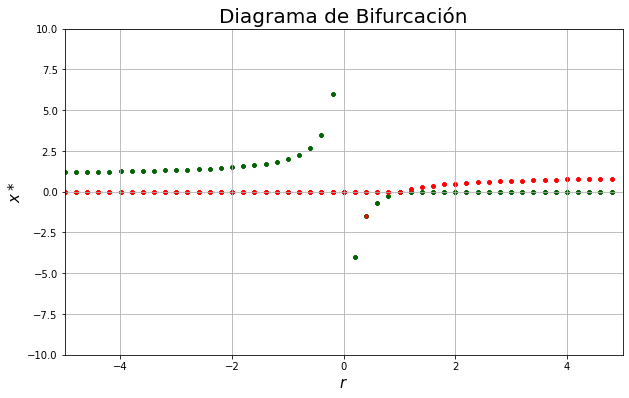

In [72]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f4,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -10, 10])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

# **3.4 PITCHFORK BIFURCATION**


## 3.4.1
### \begin{equation}
\dot { x } = rx+4x^3
\end{equation}



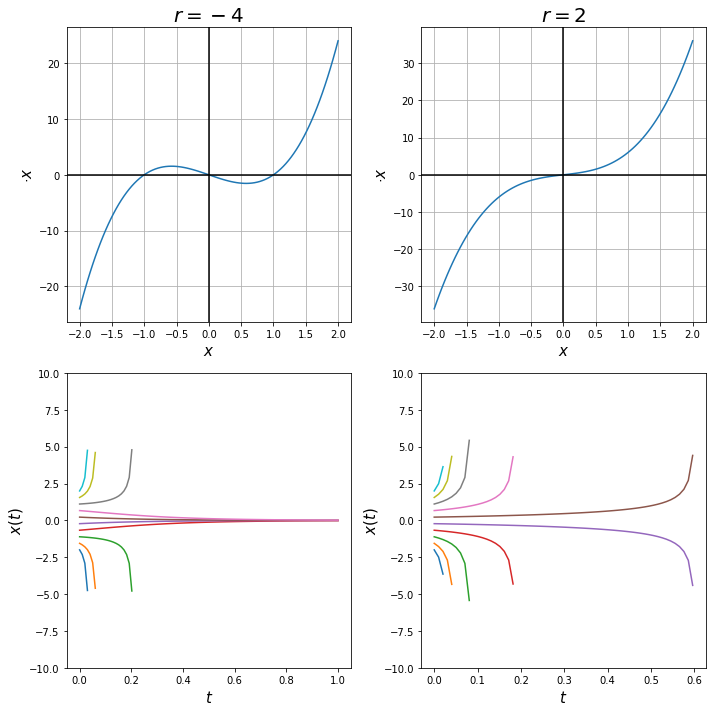

In [73]:
def f5(t,x,r,b=0):
  return r*x + 4*x**3

plot_vector_fields(f5,[-4,2],-2,2,10,0,1)

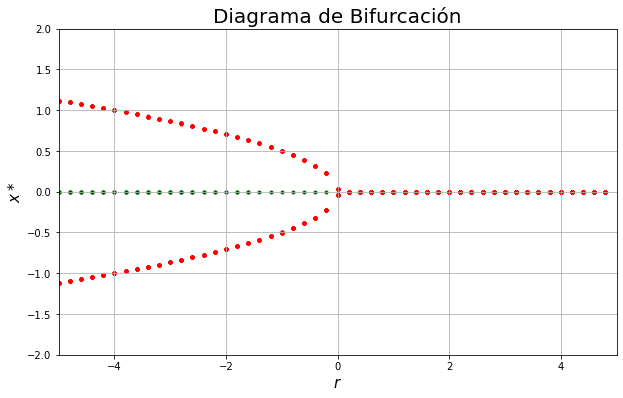

In [74]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f5,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f5,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -2, 2])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.4.2
### \begin{equation}
\dot { x } = rx-senh(x)
\end{equation}



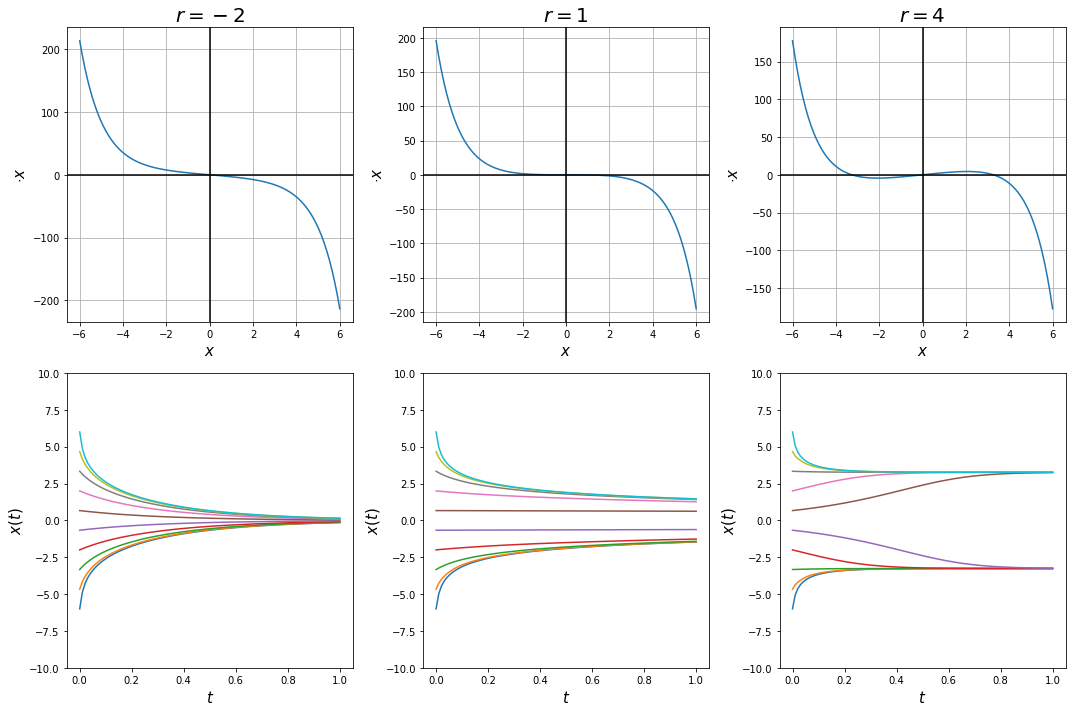

In [75]:
def f6(t,x,r,b=0):
  return r*x - np.sinh(x)

plot_vector_fields(f6,[-2,1,4],-6,6,10,0,1)

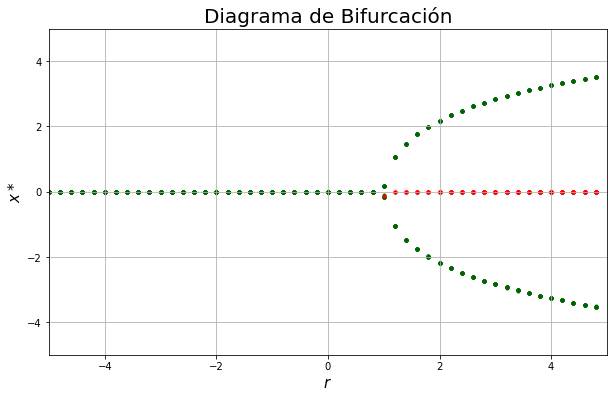

In [76]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f6,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -5, 5])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()

## 3.4.3
### \begin{equation}
\dot { x } = rx-4x^3
\end{equation}


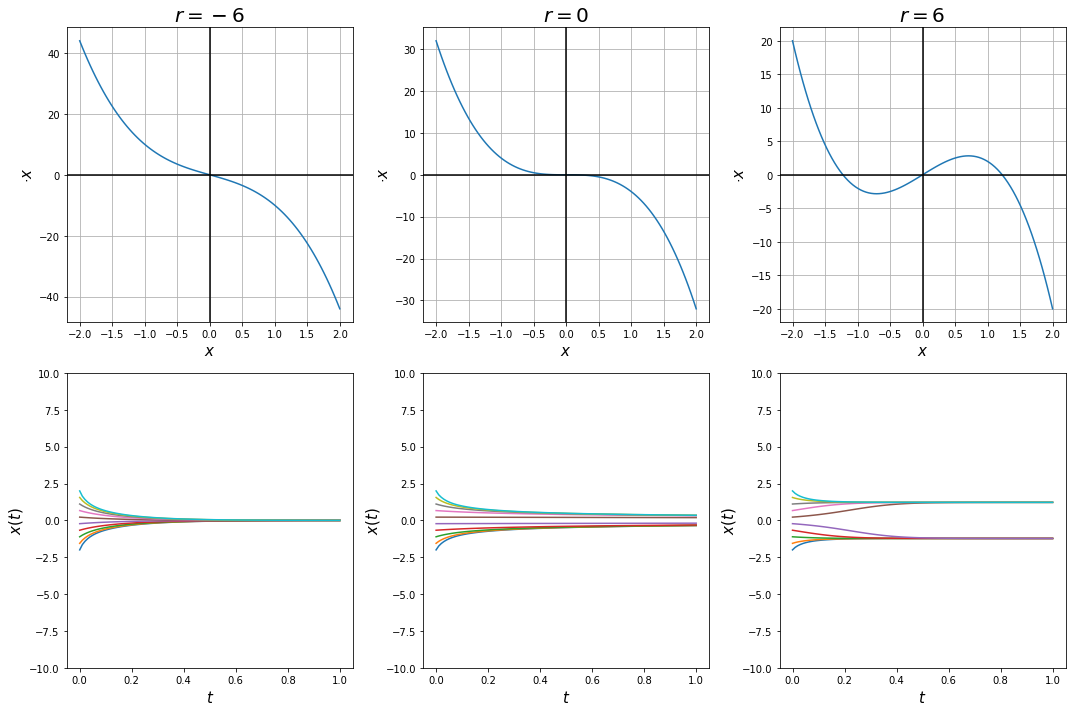

In [77]:
def f7(t,x,r,b=0):
  return r*x - 4*x**3

plot_vector_fields(f7,[-6,0,6],-2,2,10,0,1)

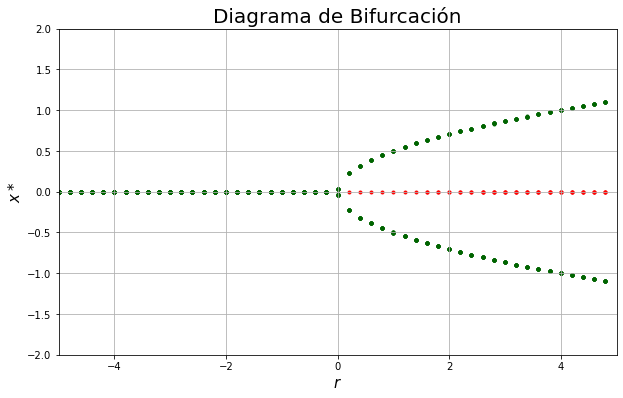

In [78]:
ti=0; tf=100; dt=100
tspam=[ti, tf]
b=0
plt.figure(figsize=(10,6))
for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='darkgreen', marker='.')

tspam=[ti, -tf]

for r in np.arange(-5,5,0.2):
  for x0 in np.arange(-5,5,0.7):
    sol=solve_ivp(f7,tspam,[x0],args=(r,b))
    plt.scatter(r, sol.y[0][-1], color='red', marker='.')


plt.axis([-5, 5, -2, 2])
plt.grid()
plt.xlabel("$r$",fontsize=15)
plt.ylabel("$x*$",fontsize=15)
plt.title("Diagrama de Bifurcación",fontsize=20)
plt.show()